In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns

In [2]:
filename = glob.glob("*.csv")[0]
print(filename)

conc = "Concentration (log[nM])"
inhib = "% Inhibition"
data = {conc: [], "peptide": [], inhib: []}
row_num = 0
f = open(filename, 'r')
for line in f:
    line_arr = line.split(",")
    if row_num == 0:
        peptide_labels = line_arr[1:]
    else:
        for i,p in enumerate(peptide_labels):
            if p not in ["AYLEAIHNF","QFKPNVILL", "QFKDNVILL","QFKANVILL","DVAEPYKVY"]: continue
            data[conc].append(round(float(line_arr[0]), 1))
            data["peptide"].append(p)
            if len(line_arr[i+1]) == 0: data[inhib].append(-1)
            else: data[inhib].append(float(line_arr[i+1]))
    row_num += 1
f.close()

C1-36 APC PBA X.csv


In [3]:
df = pd.DataFrame(data)

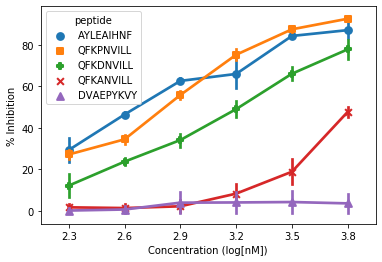

In [5]:
ax = sns.pointplot(x=conc, y=inhib, data=df, hue="peptide", 
                   hue_order=["AYLEAIHNF","QFKPNVILL","QFKDNVILL","QFKANVILL","DVAEPYKVY"],
                  markers=["o","s","P","x","^"])
#plt.xticks((2.0, 2.5, 3.0, 3.5, 4.0))
plt.savefig("/Users/jayveeabella/Downloads/exp_data_fig_withD4P.png", dpi=500)